New housing builds by property type analysis

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [96]:
data = pd.read_csv('./Data/Average-prices-Property-Type.csv')

In [97]:
data.head()

,Date,Region_Name,Area_Code,Detached_Average_Price,Detached_Index,Detached_Monthly_Change,Detached_Annual_Change,Semi_Detached_Average_Price,Semi_Detached_Index,Semi_Detached_Monthly_Change,Semi_Detached_Annual_Change,Terraced_Average_Price,Terraced_Index,Terraced_Monthly_Change,Terraced_Annual_Change,Flat_Average_Price,Flat_Index,Flat_Monthly_Change,Flat_Annual_Change
0,1995-01-01,England,E92000001,86969.0,18.6,NaN,NaN,49270.0,17.8,NaN,NaN,38864.0,16.6,NaN,NaN,40489,17.8,NaN,NaN
1,1995-01-01,Wales,W92000004,66840.0,20.9,NaN,NaN,39500.0,19.7,NaN,NaN,30772.0,19.3,NaN,NaN,31323,24.4,NaN,NaN
2,1995-01-01,Inner London,E13000001,239573.0,12.4,NaN,NaN,129730.0,11.5,NaN,NaN,99972.0,11.1,NaN,NaN,77215,13.3,NaN,NaN
3,1995-01-01,Outer London,E13000002,172477.0,15.2,NaN,NaN,96639.0,14.2,NaN,NaN,72755.0,13.6,NaN,NaN,57785,16.5,NaN,NaN
4,1995-01-01,London,E12000007,176754.0,15.0,NaN,NaN,99239.0,13.9,NaN,NaN,80634.0,12.8,NaN,NaN,67007,14.5,NaN,NaN


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139898 entries, 0 to 139897
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Date                          139898 non-null  object 
 1   Region_Name                   139898 non-null  object 
 2   Area_Code                     139898 non-null  object 
 3   Detached_Average_Price        139533 non-null  float64
 4   Detached_Index                139533 non-null  float64
 5   Detached_Monthly_Change       139138 non-null  float64
 6   Detached_Annual_Change        134817 non-null  float64
 7   Semi_Detached_Average_Price   139533 non-null  float64
 8   Semi_Detached_Index           139533 non-null  float64
 9   Semi_Detached_Monthly_Change  139138 non-null  float64
 10  Semi_Detached_Annual_Change   134817 non-null  float64
 11  Terraced_Average_Price        139644 non-null  float64
 12  Terraced_Index                139644 non-nul

In [99]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Year'] = data['Date'].dt.year

In [100]:
# data.to_csv('test.csv')

In [108]:
data.head()

,Date,Region_Name,Area_Code,Detached_Average_Price,Detached_Index,Detached_Monthly_Change,Detached_Annual_Change,Semi_Detached_Average_Price,Semi_Detached_Index,Semi_Detached_Monthly_Change,Semi_Detached_Annual_Change,Terraced_Average_Price,Terraced_Index,Terraced_Monthly_Change,Terraced_Annual_Change,Flat_Average_Price,Flat_Index,Flat_Monthly_Change,Flat_Annual_Change,Year
43761,2005-01-01,United Kingdom,K02000001,233758.0,54.3,NaN,NaN,138860.0,53.2,NaN,NaN,110564.0,51.2,NaN,NaN,107188,55.0,NaN,NaN,2005
44155,2005-02-01,United Kingdom,K02000001,232093.0,53.9,-0.7,NaN,139493.0,53.4,0.5,NaN,110272.0,51.0,-0.3,NaN,107211,55.0,0.0,NaN,2005
44549,2005-03-01,United Kingdom,K02000001,232616.0,54.0,0.2,NaN,140203.0,53.7,0.5,NaN,111665.0,51.7,1.3,NaN,108330,55.6,1.0,NaN,2005
44943,2005-04-01,United Kingdom,K02000001,233896.0,54.3,0.6,NaN,142384.0,54.5,1.6,NaN,113477.0,52.5,1.6,NaN,110164,56.6,1.7,NaN,2005
45337,2005-05-01,United Kingdom,K02000001,238123.0,55.3,1.8,NaN,143302.0,54.9,0.6,NaN,114686.0,53.1,1.1,NaN,111246,57.1,1.0,NaN,2005


In [101]:
data["Detached_Average_Price"] = pd.to_numeric(data["Detached_Average_Price"], errors="coerce")


data = data[(data["Year"] >= 2005) & (data["Year"] <= 2025) & (data["Region_Name"] == "United Kingdom")]


detached_yearly_avg = (
    data.groupby("Year")["Detached_Average_Price"]
         .mean()
         .reset_index(name="Detached_AvgPrice_UK_Yearly")
)

print(detached_yearly_avg)

    Year  Detached_AvgPrice_UK_Yearly
0   2005                238298.833333
1   2006                252795.000000
2   2007                276907.750000
3   2008                263894.500000
4   2009                242319.666667
5   2010                260194.416667
6   2011                257178.750000
7   2012                255923.916667
8   2013                261048.250000
9   2014                278437.500000
10  2015                295288.333333
11  2016                315034.833333
12  2017                329963.250000
13  2018                342331.916667
14  2019                346441.916667
15  2020                357746.250000
16  2021                383565.416667
17  2022                423247.666667
18  2023                426177.000000
19  2024                424985.833333
20  2025                439534.600000


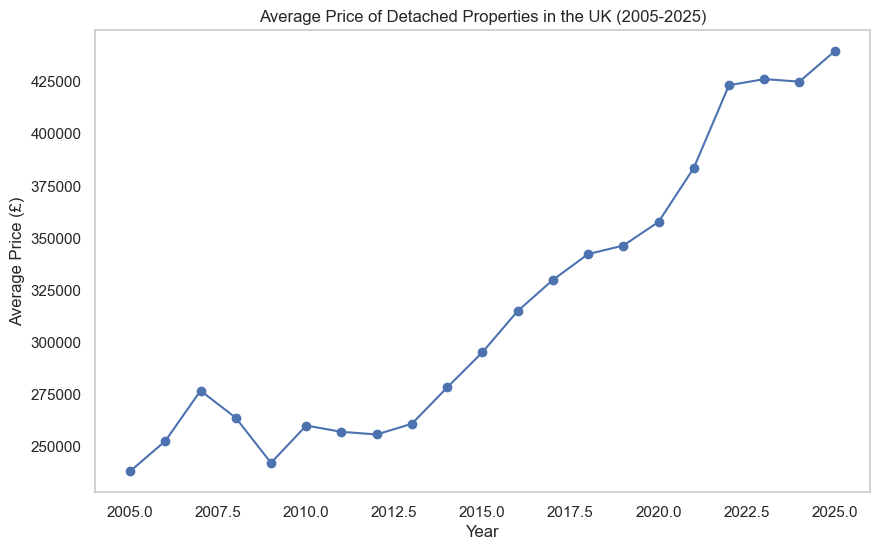

In [102]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(detached_yearly_avg["Year"], detached_yearly_avg["Detached_AvgPrice_UK_Yearly"], marker='o')
plt.title("Average Price of Detached Properties in the UK (2005-2025)")
plt.xlabel("Year")
plt.ylabel("Average Price (£)")
plt.grid()
plt.show()      

In [103]:
#Average yearly price of semi-detached properties in the UK from 2005 to 2025

data["Semi_Detached_Average_Price"] = pd.to_numeric(data["Semi_Detached_Average_Price"], errors="coerce")

data = data[(data["Year"] >= 2005) & (data["Year"] <= 2025) & (data["Region_Name"] == "United Kingdom")]

semi_detached_yearly_avg = (
    data.groupby("Year")["Semi_Detached_Average_Price"]
         .mean()
         .reset_index(name="Semi_Detached_AvgPrice_UK_Yearly")
)
print(semi_detached_yearly_avg)

    Year  Semi_Detached_AvgPrice_UK_Yearly
0   2005                     143954.750000
1   2006                     154185.833333
2   2007                     167808.750000
3   2008                     159731.750000
4   2009                     145843.666667
5   2010                     154618.500000
6   2011                     151794.083333
7   2012                     152373.333333
8   2013                     155700.916667
9   2014                     166821.750000
10  2015                     176574.916667
11  2016                     188619.416667
12  2017                     197306.083333
13  2018                     205098.000000
14  2019                     208462.666667
15  2020                     215315.000000
16  2021                     232945.666667
17  2022                     256667.166667
18  2023                     258728.833333
19  2024                     261415.000000
20  2025                     271120.000000


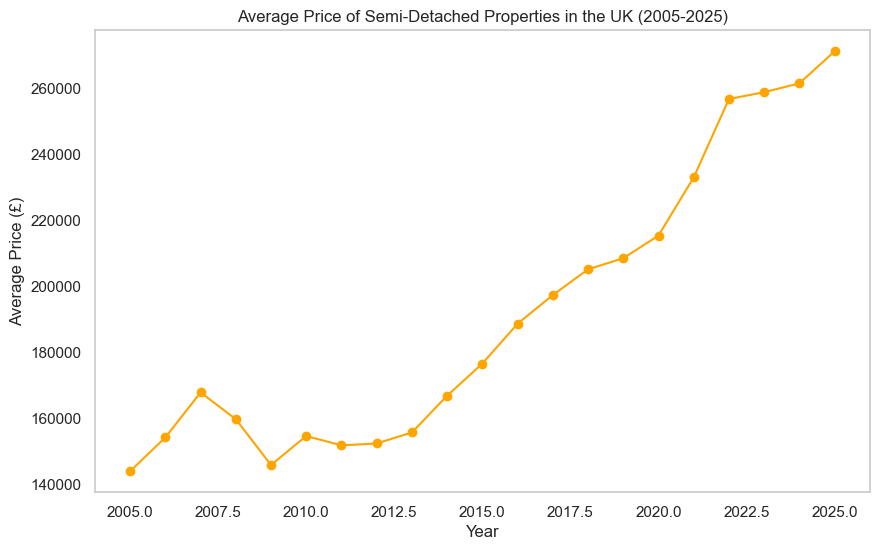

In [104]:
#plotting the results
plt.figure(figsize=(10, 6))
plt.plot(semi_detached_yearly_avg["Year"], semi_detached_yearly_avg["Semi_Detached_AvgPrice_UK_Yearly"], marker='o', color='orange')
plt.title("Average Price of Semi-Detached Properties in the UK (2005-2025)")
plt.xlabel("Year")
plt.ylabel("Average Price (£)")
plt.grid()
plt.show()

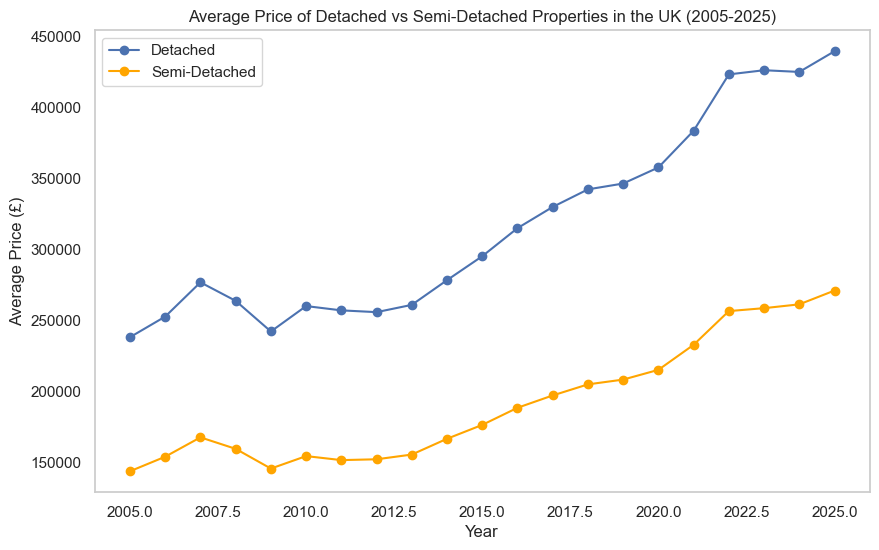

In [105]:
#comparing the average prices of detached and semi-detached properties in the UK from 2005 to 2025
plt.figure(figsize=(10, 6))
plt.plot(detached_yearly_avg["Year"], detached_yearly_avg["Detached_AvgPrice_UK_Yearly"], marker='o', label='Detached')
plt.plot(semi_detached_yearly_avg["Year"], semi_detached_yearly_avg["Semi_Detached_AvgPrice_UK_Yearly"], marker='o', label='Semi-Detached', color='orange')
plt.title("Average Price of Detached vs Semi-Detached Properties in the UK (2005-2025)")
plt.xlabel("Year")
plt.ylabel("Average Price (£)")
plt.legend()
plt.grid()
plt.show()

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 245 entries, 43761 to 139897
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date                          245 non-null    datetime64[ns]
 1   Region_Name                   245 non-null    object        
 2   Area_Code                     245 non-null    object        
 3   Detached_Average_Price        245 non-null    float64       
 4   Detached_Index                245 non-null    float64       
 5   Detached_Monthly_Change       244 non-null    float64       
 6   Detached_Annual_Change        233 non-null    float64       
 7   Semi_Detached_Average_Price   245 non-null    float64       
 8   Semi_Detached_Index           245 non-null    float64       
 9   Semi_Detached_Monthly_Change  244 non-null    float64       
 10  Semi_Detached_Annual_Change   233 non-null    float64       
 11  Terraced_Average_Price        

In [111]:
data["Terraced_Average_Price"] = pd.to_numeric(data["Terraced_Average_Price"], errors="coerce")


data = data[(data["Year"] >= 2005) & (data["Year"] <= 2025) & (data["Region_Name"] == "United Kingdom")]

terraced_yearly_avg_uk = (
    data.groupby("Year")["Terraced_Average_Price"]
         .mean()
         .reset_index(name="Terraced_AvgPrice_UK_Yearly")
)


print(terraced_yearly_avg_uk)

    Year  Terraced_AvgPrice_UK_Yearly
0   2005                115673.500000
1   2006                126262.333333
2   2007                139459.916667
3   2008                132915.416667
4   2009                121156.583333
5   2010                127861.250000
6   2011                125272.750000
7   2012                126527.833333
8   2013                129725.833333
9   2014                140126.083333
10  2015                148302.833333
11  2016                158579.583333
12  2017                164994.250000
13  2018                170757.583333
14  2019                173019.333333
15  2020                178956.916667
16  2021                195639.500000
17  2022                214619.666667
18  2023                214733.916667
19  2024                218437.500000
20  2025                224324.600000


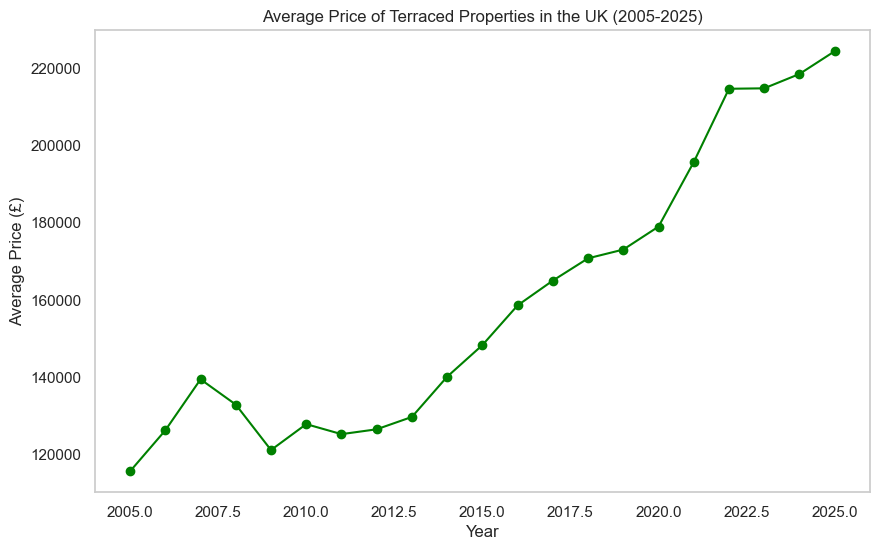

In [112]:
#plot the terraced property prices
plt.figure(figsize=(10, 6))
plt.plot(terraced_yearly_avg_uk["Year"], terraced_yearly_avg_uk["Terraced_AvgPrice_UK_Yearly"], marker='o', color='green')
plt.title("Average Price of Terraced Properties in the UK (2005-2025)")
plt.xlabel("Year")
plt.ylabel("Average Price (£)")
plt.grid()
plt.show()


In [113]:
#Flat properties average prices in the UK from 2005 to 2025
data["Flat_Average_Price"] = pd.to_numeric(data["Flat_Average_Price"], errors="coerce")
data = data[(data["Year"] >= 2005) & (data["Year"] <= 2025) & (data["Region_Name"] == "United Kingdom")]
flat_yearly_avg_uk = (
    data.groupby("Year")["Flat_Average_Price"]
         .mean()
         .reset_index(name="Flat_AvgPrice_UK_Yearly")
)
print(flat_yearly_avg_uk)

    Year  Flat_AvgPrice_UK_Yearly
0   2005            111432.333333
1   2006            121073.333333
2   2007            134728.583333
3   2008            131311.750000
4   2009            118075.250000
5   2010            122405.000000
6   2011            122001.916667
7   2012            122697.000000
8   2013            127691.416667
9   2014            142297.583333
10  2015            150502.333333
11  2016            162083.166667
12  2017            170371.250000
13  2018            171980.500000
14  2019            170892.333333
15  2020            172473.000000
16  2021            185501.750000
17  2022            195964.500000
18  2023            193969.916667
19  2024            194875.500000
20  2025            197385.600000


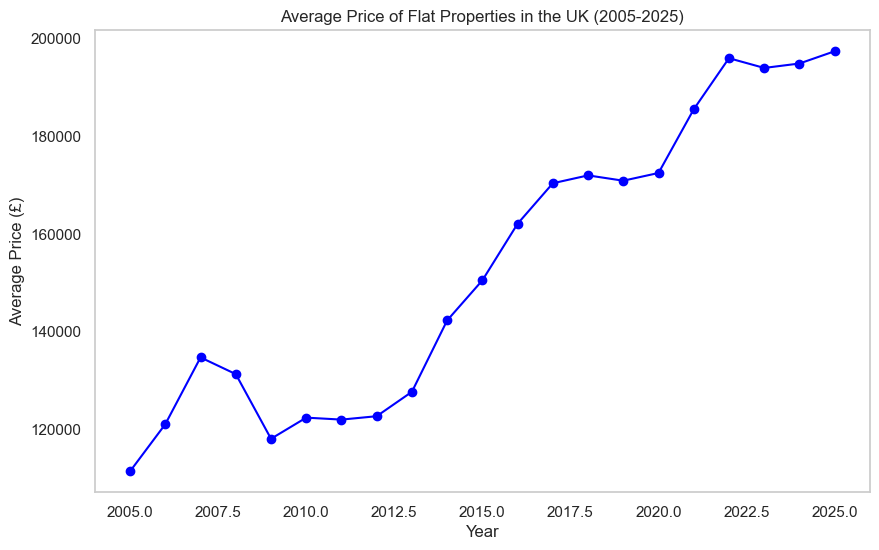

In [114]:
#plot the flat property prices
plt.figure(figsize = (10,6))
plt.plot(flat_yearly_avg_uk["Year"], flat_yearly_avg_uk["Flat_AvgPrice_UK_Yearly"], marker='o', color='blue')
plt.title("Average Price of Flat Properties in the UK (2005-2025)")
plt.xlabel("Year")
plt.ylabel("Average Price (£)")
plt.grid()
plt.show()

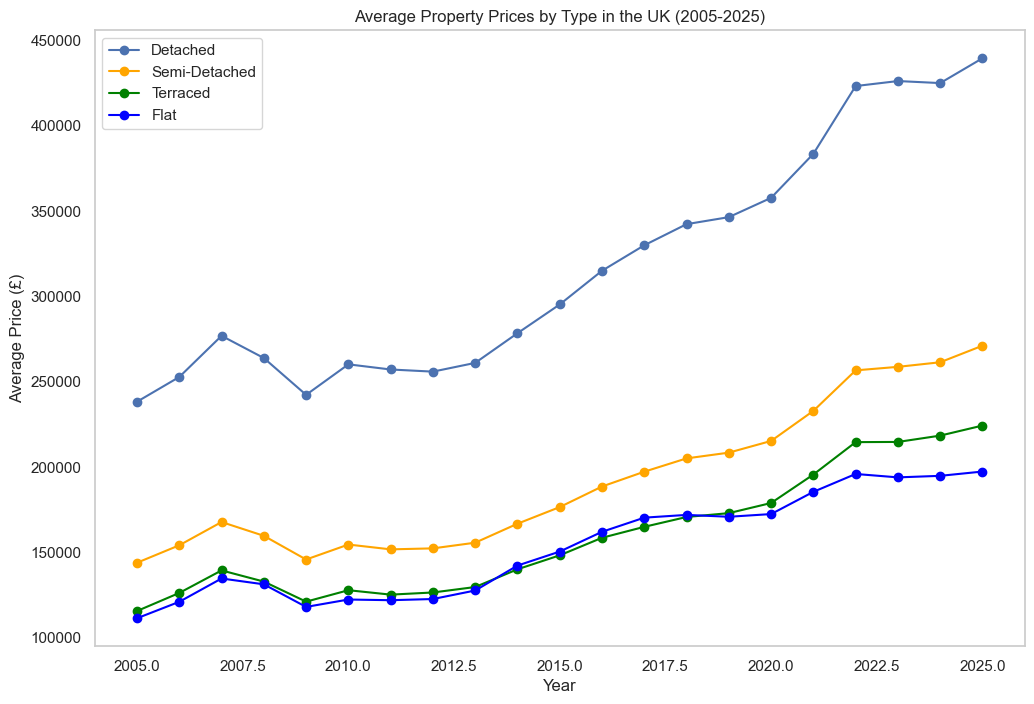

In [115]:
#plot all four property types together for comparison
plt.figure(figsize=(12, 8))
plt.plot(detached_yearly_avg["Year"], detached_yearly_avg["Detached_AvgPrice_UK_Yearly"], marker='o', label='Detached')
plt.plot(semi_detached_yearly_avg["Year"], semi_detached_yearly_avg["Semi_Detached_AvgPrice_UK_Yearly"], marker='o', label='Semi-Detached', color='orange')
plt.plot(terraced_yearly_avg_uk["Year"], terraced_yearly_avg_uk["Terraced_AvgPrice_UK_Yearly"], marker='o', label='Terraced', color='green')
plt.plot(flat_yearly_avg_uk["Year"], flat_yearly_avg_uk["Flat_AvgPrice_UK_Yearly"], marker='o', label='Flat', color='blue')
plt.title("Average Property Prices by Type in the UK (2005-2025)")
plt.xlabel("Year")
plt.ylabel("Average Price (£)")
plt.legend()
plt.grid()
plt.show()